
## Sentiment Analysis of IMDB Dataset: Crafting Interpretable Models and Scalable Big Data Pipelines for IMDb Movie Reviews Using Python and Hadoop

In [0]:
%pip install nltk


Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
# Import necessary libraries
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import nltk


# Download necessary NLTK resources(link to 1.2)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Initialize Spark Session
spark = SparkSession.builder.appName("IMDB Sentiment Analysis").getOrCreate()

# Load dataset
df = spark.read.csv("/FileStore/tables/uIMDB_Dataset.csv", header=True, inferSchema=True).toPandas()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
# Task 1.1. Data Sampling
df_sample = df.sample(frac=0.2, random_state=42)

In [0]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources(link to 1.2)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


# Task 1.2. Data Preprocessing

# Define a more comprehensive list of pronouns to be removed.
pronouns = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", 
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", 
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", 
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", 
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", 
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", 
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", 
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", 
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", 
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
}
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Convert text to lowercase to ensure uniformity
    text = text.lower()
    # Tokenize the text into individual words
    tokens = word_tokenize(text)
    # Remove stop words and pronouns
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in pronouns]
    return ' '.join(tokens)

df_sample['processed_review'] = df_sample['review'].apply(preprocess_text)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:

# Combine all preprocessed reviews into a single string
all_reviews = ' '.join(df_sample['processed_review'])

# Tokenize the combined string into individual words
all_words = word_tokenize(all_reviews)

# Create a set of unique words
unique_words = set(all_words)

# Print or inspect the set of unique words
print("Number of unique words:", len(unique_words))
print("Some unique words:", list(unique_words)[:100])  # Print first 100 unique words as a sample

# Optionally, check for common pronouns in the unique words set to ensure they have been removed
common_pronouns = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", 
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", 
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", 
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", 
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", 
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", 
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", 
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", 
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", 
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"}
pronouns_in_data = common_pronouns.intersection(unique_words)

if pronouns_in_data:
    print("Pronouns found in data:", pronouns_in_data)
else:
    print("No common pronouns found in the preprocessed data.")


Number of unique words: 77367
Some unique words: ['congolese', 'psychosis', 'overzealous', 'reminiscence', 'awesome.the', 'exterior.soon', 'circle', 'fingerprints', 'calamitous', 'third-act', 'ranier', 'well-textured', 'principals', 'obi-wan', 'jalopies', 'divers', 'superbly-staged', 'riotously', 'sheehan', 'phili', 'bio-chemical', 'withering', 'review', 'haphazardly', 'flashlights', 'largo', 'kieslowsky', 'good.want', 'unsavoury', 'derided', 'wired', 'defenitly', 'greuesome', 'supernova', 'papier-mache', 'fairy-tale', 'coombs', "12'if", 'only.when', 'brandon', 'volition', 'hi', 'preceding', 'kill.the', 'mystique', 'w/jimmy', 'sundry', 'passe', 'unstoppable', 'hits.look', 'mutiny', 'antithesis', 'crop', 'wrong-headed', 'heartwarming.when', 'wuthering', 'debated', 'two-by-two', 'cnd', '2007.', 'avengers', 'focal', 'rights-', 'whirl', 'sandwiched', 'crawled', 'lee-thompson', 'prentiss', 'm.p.or', 'kowalski', 'character.another', "'balderdash", 'dread', 'highly-charged', 'chang', 'helped.

In [0]:

from sklearn.feature_extraction.text import CountVectorizer

# Task 1.3. Feature Extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_sample['processed_review'])
y = df_sample['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)



In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Task 1.4. Model Selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = [accuracy, precision, recall, f1]

results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score"]).T
best_model_name = results_df["F1 Score"].idxmax()
best_model = models[best_model_name]

# Task 1.5. Training a Sentiment Analysis using best Model
# Model has been trained in the previous step

# Task 1.6. Model Evaluation
# Evaluation metrics have been calculated in the previous step


In [0]:
# Task 1.7. Feature Importance
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
elif hasattr(best_model, "coef_"):
    importances = best_model.coef_[0]

feature_names = vectorizer.get_feature_names_out()
feature_names = np.array(vectorizer.get_feature_names_out())

# Extract the coefficients and get the indices of the 25 largest and smallest
coefs_with_fns = sorted(zip(best_model.coef_[0], feature_names))
top_25_negative = coefs_with_fns[:25]
top_25_positive = coefs_with_fns[-25:]

# The top 25 features for the negative class
top_negative_words = [fn for coef, fn in top_25_negative]
top_negative_coefs = [coef for coef, fn in top_25_negative]

# The top 25 features for the positive class
top_positive_words = [fn for coef, fn in top_25_positive]
top_positive_coefs = [coef for coef, fn in top_25_positive]

# Print the top 25 important features for positive sentiments
print("Top 25 important features for positive sentiment:")
print(pd.DataFrame({'Feature': top_positive_words, 'Coefficient': top_positive_coefs}))

# Print the top 25 important features for negative sentiments
print("Top 25 important features for negative sentiment:")
print(pd.DataFrame({'Feature': top_negative_words, 'Coefficient': top_negative_coefs}))

Top 25 important features for positive sentiment:
        Feature  Coefficient
0     brilliant     0.755247
1          rare     0.759775
2          best     0.770479
3        chance     0.775369
4        plenty     0.780697
5     wonderful     0.801515
6   wonderfully     0.808764
7        summer     0.817099
8    definitely     0.829628
9           fun     0.881936
10    available     0.893425
11    enjoyable     0.899659
12       subtle     0.950227
13        solid     0.958016
14      enjoyed     0.973383
15   incredible     0.990049
16        great     0.992114
17    hilarious     1.001129
18        today     1.002697
19        loved     1.086194
20     favorite     1.107953
21       superb     1.330419
22      perfect     1.400563
23      amazing     1.547823
24    excellent     1.592680
Top 25 important features for negative sentiment:
           Feature  Coefficient
0            worst    -2.318320
1            waste    -2.094249
2            awful    -1.795004
3         horrible

Model Comparison Results:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression    0.8600   0.846968  0.879121  0.862745
Random Forest          0.8480   0.847458  0.849151  0.848303
Naive Bayes            0.8395   0.865591  0.804196  0.833765


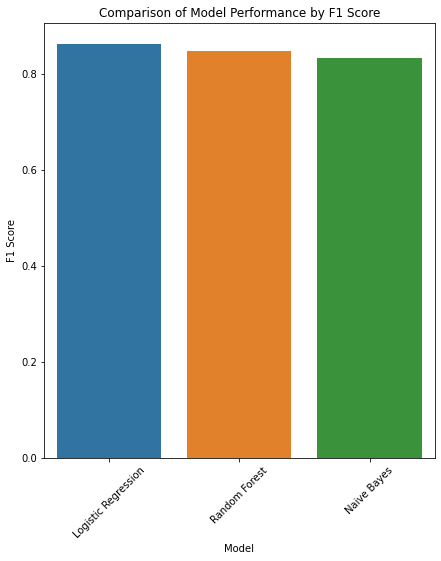

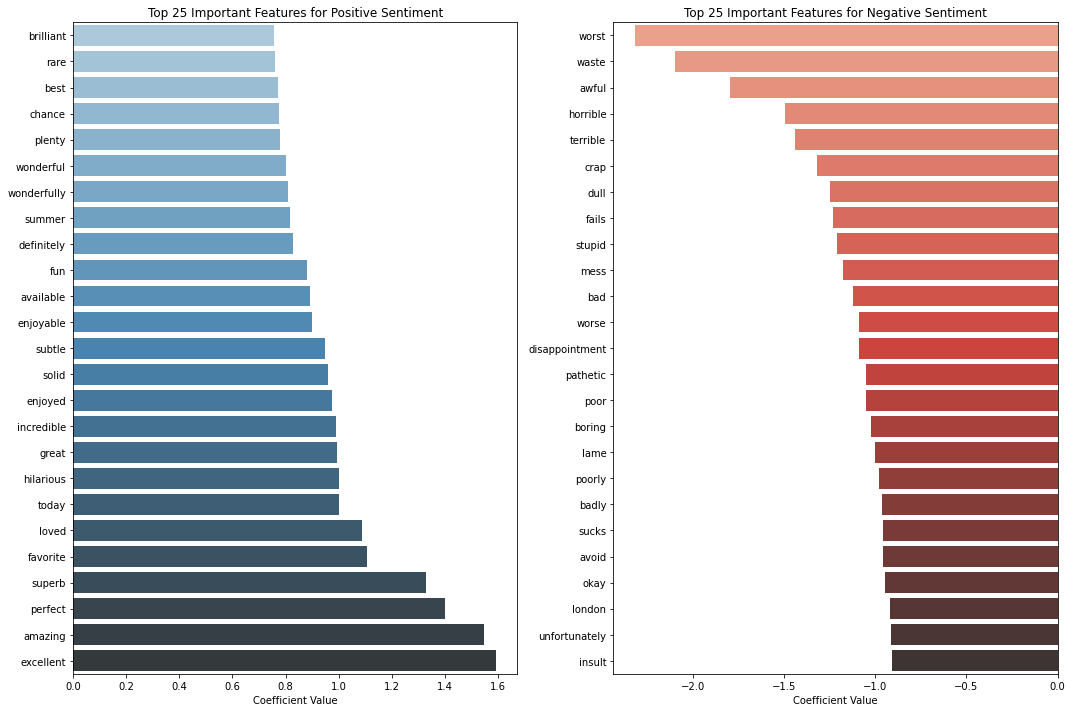

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print comparison results in numbers
print("Model Comparison Results:")
print(results_df)

plt.figure(figsize=(7, 8))

# Plotting the F1 Score for each model
sns.barplot(x=results_df.index, y=results_df['F1 Score'])

plt.title('Comparison of Model Performance by F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()

# Plot the top 25 important features for positive and negative sentiments
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

sns.barplot(y=top_positive_words, x=top_positive_coefs, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 25 Important Features for Positive Sentiment')
axes[0].set_xlabel('Coefficient Value')

sns.barplot(y=top_negative_words, x=top_negative_coefs, ax=axes[1], palette='Reds_d')
axes[1].set_title('Top 25 Important Features for Negative Sentiment')
axes[1].set_xlabel('Coefficient Value')

plt.tight_layout()
plt.show()


In [0]:
/usr/local/hadoop/bin/hdfs dfs -mkdir /input
/usr/local/hadoop/bin/hdfs dfs -put uIMDB_Dataset.csv hdfs://localhost:9000/input/

In [0]:
import sys
import re
import nltk
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

# Download necessary NLTK resources for tokenization and stopwords
nltk.download('punkt')  # Download data for tokenizer
nltk.download('stopwords')  # Download list of stopwords
from nltk.corpus import stopwords

# Define an extended set of stop words including common pronouns and other frequent non-informative words
stop_words_with_pronouns = set([
    # Listing common pronouns
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", 
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", 
    # Adding additional common words and symbols that are often not informative for analysis
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", 
    # ... other words and symbols ...
    "5", "b", "10", "1", "7", "8", "!", "#", ".", "(", ")", "?", "...", "'s", "``", "n't", "-", "*", ":", "m", "..", "'", 
    "$", "%", "&", "'60s", "'60´s", "'62", "'68", "'70", "'70s", "'86", "'88", "'92"
]) | set(stopwords.words('english'))  # Combine with NLTK's pre-defined list of English stop words

def clean_text(text):
    """
    Function to clean text data by removing HTML tags, converting text to lowercase,
    tokenizing the text into words, and removing stop words and pronouns.
    """
    # Use BeautifulSoup to remove HTML tags from the text
    text = BeautifulSoup(text, features="html.parser").get_text()
    # Convert all characters in the text to lowercase to standardize the data
    text = text.lower()
    # Tokenize the cleaned text into individual words
    tokens = word_tokenize(text)
    # Filter out any tokens that are in the extended list of stop words and pronouns
    filtered_tokens = [word for word in tokens if word not in stop_words_with_pronouns]
    return filtered_tokens

# Read each line of input from standard input (sys.stdin) for processing
for line in sys.stdin:
    line = line.strip()  # Remove any leading/trailing whitespace from the line
    parts = line.split(',')  # Attempt to split the line into parts using comma as a delimiter
    
    # Check if the line correctly splits into exactly two parts: review text and sentiment label
    if len(parts) != 2:
        continue  # Skip this line if it does not have exactly two parts
    
    # Assign the split parts to variables for further processing
    review_text, sentiment = parts
    
    # Clean the review text to remove HTML, lowercase text, tokenize, and remove stop words/pronouns
    tokens = clean_text(review_text)
    
    # Print each token alongside its associated sentiment label
    for token in tokens:
        print(f"{token}\t{sentiment}")


In [0]:
#!/usr/bin/env python
import sys

# Initialize variables to track the current token and its sentiment counts
current_token = None
current_sentiment_counts = {'positive': 0, 'negative': 0}

def safe_increment(dictionary, key):
    """
    Safely increments the count for a given sentiment key in the dictionary.
    If the key doesn't exist, print a warning message.
    """
    if key in dictionary:
        dictionary[key] += 1
    else:
        # Print warning if sentiment is not recognized
        print(f"Warning: Sentiment '{key}' not recognized.", file=sys.stderr)

# Process each line of input from stdin
for line in sys.stdin:
    line = line.strip()
    try:
        # Attempt to split each line into token and sentiment parts
        token, sentiment = line.split('\t', 1)
        sentiment = sentiment.strip()  # Ensure no leading/trailing spaces
    except ValueError as e:
        # If splitting fails, log an error and skip to the next line
        print(f"Error parsing line: {line}. Error: {e}", file=sys.stderr)
        continue

    # Check if we've moved on to a new token
    if token != current_token:
        # If this is not the first token, print the counts for the previous token
        if current_token is not None:
            print(f"{current_token}\t{current_sentiment_counts}")
        # Reset the current token and its counts
        current_token = token
        current_sentiment_counts = {'positive': 0, 'negative': 0}

    # Increment the sentiment count for the current token
    safe_increment(current_sentiment_counts, sentiment)

# After processing all lines, output the last token's counts if it exists
if current_token is not None:
    print(f"{current_token}\t{current_sentiment_counts}")


In [0]:
'aaaaagh	{'positive': 1, 'negative': 0}
'aimee	{'positive': 1, 'negative': 0}
'amber	{'positive': 0, 'negative': 1}
'arthur	{'positive': 2, 'negative': 0}
'associates	{'positive': 0, 'negative': 1}
'atonement	{'positive': 0, 'negative': 1}
'awards	{'positive': 0, 'negative': 1}
'awful	{'positive': 0, 'negative': 2}
'beaches	{'positive': 0, 'negative': 1}
'been	{'positive': 0, 'negative': 1}
'bland	{'positive': 0, 'negative': 1}
'blues	{'positive': 0, 'negative': 1}
'bout	{'positive': 1, 'negative': 0}
'branded	{'positive': 1, 'negative': 0}
'brice	{'positive': 1, 'negative': 0}
'bulletproof	{'positive': 0, 'negative': 1}
'bunny	{'positive': 1, 'negative': 0}
'captain	{'positive': 1, 'negative': 0}
'carol	{'positive': 1, 'negative': 0}
'cause	{'positive': 1, 'negative': 0}

In [0]:
import ast  # Import the ast module for safely converting strings to dictionaries

def read_mapreduce_output(file_path):
    """
    Reads the MapReduce output file, parsing each line into tokens
    along with their positive and negative counts.
    """
    tokens_data = []  # Initialize an empty list to store token data
    with open(file_path, 'r') as file:  # Open the file for reading
        for line in file:  # Iterate through each line in the file
            line = line.strip()  # Remove leading/trailing whitespace
            if not line or line.startswith("#"):  # Skip empty lines or lines starting with '#'
                continue
            try:
                # Split the line into token and counts parts, then evaluate the counts part as a dictionary
                token, counts_str = line.split('\t', 1)
                counts = ast.literal_eval(counts_str)
                # Append a tuple with the token and its positive/negative counts to the list
                tokens_data.append((token, counts.get('positive', 0), counts.get('negative', 0)))
            except ValueError as e:
                # Handle and print errors related to splitting the line
                print(f"Error parsing line: {line}. Error: {e}")
            except SyntaxError as e:
                # Handle and print errors related to evaluating the counts string
                print(f"Syntax error parsing counts: {counts_str}. Error: {e}")
    return tokens_data  # Return the list of token data

def print_top_positive_tokens(tokens_data, top_n=100):
    """ Prints the top n tokens with the highest positive sentiment counts."""
    # Sort the tokens by positive counts in descending order
    sorted_tokens = sorted(tokens_data, key=lambda x: x[1], reverse=True)
    print(f"Top {top_n} positive sentiment tokens:")
    for i, (token, pos_count, _) in enumerate(sorted_tokens[:top_n], start=1):
        # Print each token and its positive count
        print(f"{token}, {pos_count}")

def print_top_negative_tokens(tokens_data, top_n=100):
    """ Prints the top n tokens with the highest negative sentiment counts """
    # Sort the tokens by negative counts in descending order
    sorted_tokens = sorted(tokens_data, key=lambda x: x[2], reverse=True)
    print(f"Top {top_n} negative sentiment tokens:")
    for i, (token, _, neg_count) in enumerate(sorted_tokens[:top_n], start=1):
        # Print each token and its negative count
        print(f"{token}, {neg_count}")

# Define the path to the MapReduce output file
file_path = '/home/hdoop/hackathon/map7_red77/part-00000'
# Read and parse the MapReduce output
tokens_data = read_mapreduce_output(file_path)
# Print the top 100 tokens for positive sentiment
print_top_positive_tokens(tokens_data, 100)
print("\n")  # Print a newline for better visual separation
# Print the top 100 tokens for negative sentiment
print_top_negative_tokens(tokens_data, 100)


In [0]:
hadoop_list_pos:  "movie", "film", "one", "good", "like", "great", "see", "really", "story", "time",
    "would", "watch", "well", "love", "also", "show", "best", "think", "people", "get",
    "seen", "movies", "ever", "much", "first", "even", "could", "watching", "acting",
    "know", "many", "saw", "films", "made", "way", "life", "go", "say", "still", "funny",
    "never", "thought", "make", "better", "lot", "years", "excellent", "back", "find",
    "little", "two", "characters", "end", "makes", "old", "'m", "actors", "bad", "loved",
    "done", "look", "watched", "dvd", "must", "got", "recommend", "fun", "scene", "man",
    "real", "scenes", "series", "every", "enjoy", "enjoyed", "want", "character", "right",
    "going", "role", "times", "anyone", "something", "cast", "another", "job", "new",
    "part", "thing", "wonderful", "performance", "action", "family", "tv", "'ve",
    "plot", "TRUE", "comedy", "give"

hadoop_list_neg:  "movie", "film", "like", "one", "bad", "would", "good", "really", "could", "even",
    "see", "watch", "time", "movies", "made", "get", "make", "ever", "people", "acting",
    "think", "worst", "plot", "story", "seen", "much", "better", "watching", "way", "first",
    "also", "say", "show", "actors", "know", "never", "well", "many", "funny", "got",
    "nothing", "scenes", "little", "end", "something", "go", "stupid", "great", "thing",
    "characters", "waste", "two", "going", "back", "life", "money", "thought", "whole",
    "'ve", "minutes", "want", "actually", "saw", "script", "films", "real", "awful", "find",
    "love", "makes", "'m", "character", "big", "another", "anyone", "look", "old", "watched",
    "ca", "part", "believe", "guy", "terrible", "horror", "lot", "give", "horrible", "director",
    "best", "come", "enough", "looks", "still", "scene", "anything", "cast", "done", "must", "gets"


In [0]:
'''
1- script to find the matching percentage in between positive top 100 words from hadoop comparing with top positive 25 words by the output of databricks code using logistic regression.
2- script to find the matching percentage in between negative top 100 words from hadoop comparing with top negative 25 words by the output of databricks code using logistic regression.
'''
def calculate_match_percentage(list1, list2):
    # Calculate the number of matching elements
    matching_elements = set(list1) & set(list2)
    # Calculate the percentage match
    if len(list1) == 0:
        return 0  # Avoid division by zero if list1 is empty
    match_percentage = (len(matching_elements) / len(set(list1))) * 100
    return match_percentage

# Corrected lists with quotes around the words in list1
Databricks_list_MIX = [ "awesome", "south", "release", "gem", "chance",
    "brilliant", "wonderful", "fun", "enjoyed", "funniest",
    "great", "masterpiece", "incredible", "available", "subtle",
    "enjoyable", "today", "favorite", "hilarious", "loved",
    "superb", "excellent", "amazing", "perfect","worst", "waste", 
          "awful", "horrible", "dull", "disappointment", "terrible", 
          "fails", "stupid", "crap", "mess", "lame", "bad", "pathetic", 
          "boring", "laughable", "okay", "poor", "failed", "poorly",
          "worse", "insult", "disappointing", "avoid", "save"]

Databricks_list_pos = [ "awesome", "south", "release", "gem", "chance",
    "brilliant", "wonderful", "fun", "enjoyed", "funniest",
    "great", "masterpiece", "incredible", "available", "subtle",
    "enjoyable", "today", "favorite", "hilarious", "loved",
    "superb", "excellent", "amazing", "perfect","worst", "waste", 
          "awful", "horrible", "dull", "disappointment", "terrible", 
          "fails", "stupid", "crap", "mess", "lame", "bad", "pathetic", 
          "boring", "laughable", "okay", "poor", "failed", "poorly",
          "worse", "insult", "disappointing", "avoid", "save"]

Databricks_list_neg = [ "awesome", "south", "release", "gem", "chance",
    "brilliant", "wonderful", "fun", "enjoyed", "funniest",
    "great", "masterpiece", "incredible", "available", "subtle",
    "enjoyable", "today", "favorite", "hilarious", "loved",
    "superb", "excellent", "amazing", "perfect","worst", "waste", 
          "awful", "horrible", "dull", "disappointment", "terrible", 
          "fails", "stupid", "crap", "mess", "lame", "bad", "pathetic", 
          "boring", "laughable", "okay", "poor", "failed", "poorly",
          "worse", "insult", "disappointing", "avoid", "save"]

hadoop_list_pos = [  "movie", "film", "one", "good", "like", "great", "see", "really", "story", "time",
    "would", "watch", "well", "love", "also", "show", "best", "think", "people", "get",
    "seen", "movies", "ever", "much", "first", "even", "could", "watching", "acting",
    "know", "many", "saw", "films", "made", "way", "life", "go", "say", "still", "funny",
    "never", "thought", "make", "better", "lot", "years", "excellent", "back", "find",
    "little", "two", "characters", "end", "makes", "old", "'m", "actors", "bad", "loved",
    "done", "look", "watched", "dvd", "must", "got", "recommend", "fun", "scene", "man",
    "real", "scenes", "series", "every", "enjoy", "enjoyed", "want", "character", "right",
    "going", "role", "times", "anyone", "something", "cast", "another", "job", "new",
    "part", "thing", "wonderful", "performance", "action", "family", "tv", "'ve",
    "plot", "TRUE", "comedy", "give"]

hadoop_list_neg = [  "movie", "film", "like", "one", "bad", "would", "good", "really", "could", "even",
    "see", "watch", "time", "movies", "made", "get", "make", "ever", "people", "acting",
    "think", "worst", "plot", "story", "seen", "much", "better", "watching", "way", "first",
    "also", "say", "show", "actors", "know", "never", "well", "many", "funny", "got",
    "nothing", "scenes", "little", "end", "something", "go", "stupid", "great", "thing",
    "characters", "waste", "two", "going", "back", "life", "money", "thought", "whole",
    "'ve", "minutes", "want", "actually", "saw", "script", "films", "real", "awful", "find",
    "love", "makes", "'m", "character", "big", "another", "anyone", "look", "old", "watched",
    "ca", "part", "believe", "guy", "terrible", "horror", "lot", "give", "horrible", "director",
    "best", "come", "enough", "looks", "still", "scene", "anything", "cast", "done", "must", "gets"
]




# Calculate and print the match percentage for 100 hadoop and 25 databricks positive words
percentage = calculate_match_percentage(Databricks_list_pos, hadoop_list_pos)
print(f"positive: List one matches {percentage}% with list two.")

# Calculate and print the match percentage for 100 hadoop and 25 databricks negative words
percentage1 = calculate_match_percentage(Databricks_list_neg, hadoop_list_neg)
print(f"negative: List one matches {percentage1}% with list two.")

positive: List one matches 14.285714285714285% with list two.
negative: List one matches 16.3265306122449% with list two.
